In [2]:
import os
import shutil
import random

seed = 1
random.seed(seed)
directory = "/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/celeba/img/"
train = "/Users/devan/Desktop/AMLS_20-21_SN12345678/A2/data1/train/"
test = "/Users/devan/Desktop/AMLS_20-21_SN12345678/A2/data1/test/"
validation = "/Users/devan/Desktop/AMLS_20-21_SN12345678/A2/data1/validation/"

os.makedirs(train + "smiling/")
os.makedirs(train + "n_smiling/")
os.makedirs(test + "smiling/")
os.makedirs(test + "n_smiling/")
os.makedirs(validation + "smiling/")
os.makedirs(validation + "n_smiling/")

test_examples = train_examples = validation_examples = 0

for line in open("/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/celeba/labels.csv").readlines()[1:]:
    split_line = line.split(",")
    img_file = split_line[1]
    s_ns = split_line[3]

    random_num = random.random()

    if random_num < 0.8:
        location = train
        train_examples += 1

    elif random_num < 0.9:
        location = validation
        validation_examples += 1

    else:
        location = test
        test_examples += 1

    if int(float(s_ns)) == 1:
        shutil.copy(
            "/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/celeba/img/" + img_file,
            location + "smiling/" + img_file + ".jpg",
        )

    elif int(float(s_ns)) == -1:
        shutil.copy(
            "/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/celeba/img/" + img_file,
            location + "n_smiling/" + img_file + ".jpg",
        )

print(f"Number of training examples {train_examples}")
print(f"Number of test examples {test_examples}")
print(f"Number of validation examples {validation_examples}")

Number of training examples 3955
Number of test examples 521
Number of validation examples 524


In [2]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_examples = 3955
test_examples = 521
validation_examples = 524
img_height = img_width = 90
batch_size = 32

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=(90,90,1)), #We dont flatten the input since we are using convolutional neural networks
        layers.Conv2D(32, 11, strides = 4 , padding='same', activation = 'relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides = 2,padding='same'),
        layers.Conv2D(96, 5, strides = 1 , padding='same', activation = 'relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides = 2,padding='same'),
        layers.Conv2D(128, 5, strides = 1 , padding='same', activation = 'relu'),
        layers.Conv2D(96, 5, strides = 1 , padding='same', activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(160, activation='sigmoid'),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid'),
    ]
)

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 15,
    zoom_range = (0.95,0.95),
    horizontal_flip = True,
    vertical_flip = True,
    data_format = "channels_last",
    dtype = tf.float32,
)

validation_datagen = ImageDataGenerator(rescale = 1.0/255, dtype = tf.float32)
test_datagen = ImageDataGenerator(rescale = 1.0/255, dtype = tf.float32)

train_gen = train_datagen.flow_from_directory(
"/Users/devan/Desktop/AMLS_20-21_SN12345678/A2/data1/train/",
target_size = (img_height, img_width),
batch_size = batch_size,
color_mode = "grayscale",
class_mode = "binary",   
shuffle = True,
seed = 123,
)

validation_gen = validation_datagen.flow_from_directory(
"/Users/devan/Desktop/AMLS_20-21_SN12345678/A2/data1/validation/",
target_size = (img_height, img_width),
batch_size = batch_size,
color_mode = "grayscale",
class_mode = "binary",   
shuffle = True,
seed = 123,
)

test_gen = test_datagen.flow_from_directory(
"/Users/devan/Desktop/AMLS_20-21_SN12345678/A2/data1/test/",
target_size = (img_height, img_width),
batch_size = batch_size,
color_mode = "grayscale",
class_mode = "binary",   
shuffle = True,
seed = 123,
)


Found 3955 images belonging to 2 classes.
Found 524 images belonging to 2 classes.
Found 521 images belonging to 2 classes.


In [7]:
model.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits = False),
    optimizer = keras.optimizers.Adam(lr = 3e-4),
    metrics = ["accuracy"],
)

In [8]:
history = model.fit(
train_gen,
epochs=10,
verbose=2,
steps_per_epoch=train_examples // batch_size,
validation_data=validation_gen,
validation_steps=validation_examples // batch_size,)

Epoch 1/10
123/123 - 20s - loss: 0.7115 - accuracy: 0.4958 - val_loss: 0.6915 - val_accuracy: 0.5605
Epoch 2/10
123/123 - 19s - loss: 0.6958 - accuracy: 0.5328 - val_loss: 0.6718 - val_accuracy: 0.5684
Epoch 3/10
123/123 - 18s - loss: 0.6584 - accuracy: 0.6141 - val_loss: 0.6357 - val_accuracy: 0.6211
Epoch 4/10
123/123 - 18s - loss: 0.6532 - accuracy: 0.6261 - val_loss: 0.6330 - val_accuracy: 0.6582
Epoch 5/10
123/123 - 18s - loss: 0.6470 - accuracy: 0.6317 - val_loss: 0.6332 - val_accuracy: 0.6270
Epoch 6/10
123/123 - 19s - loss: 0.6324 - accuracy: 0.6393 - val_loss: 0.6150 - val_accuracy: 0.6582
Epoch 7/10
123/123 - 18s - loss: 0.6237 - accuracy: 0.6561 - val_loss: 0.6117 - val_accuracy: 0.6680
Epoch 8/10
123/123 - 18s - loss: 0.6267 - accuracy: 0.6566 - val_loss: 0.6879 - val_accuracy: 0.5957
Epoch 9/10
123/123 - 18s - loss: 0.6173 - accuracy: 0.6638 - val_loss: 0.5865 - val_accuracy: 0.6855
Epoch 10/10
123/123 - 19s - loss: 0.5970 - accuracy: 0.6870 - val_loss: 0.5955 - val_accura

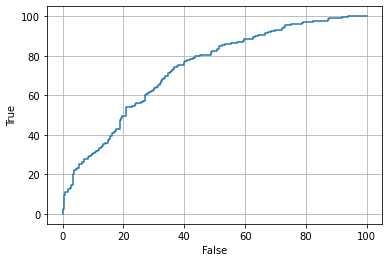

In [9]:
def plot_roc(labels, data):
    predictions = model.predict(data)
    fp, tp, _ = roc_curve(labels,predictions)
    
    plt.plot(100*fp, 100*tp)
    plt.xlabel("False")
    plt.ylabel("True")
    plt.grid()
    plt.show
    
test_labels = np.array([])
num_batches = 0

for _, y in test_gen:
    test_labels = np.append(test_labels, y)
    num_batches += 1
    if num_batches == math.ceil(test_examples / batch_size):
        break
        
plot_roc(test_labels, test_gen)

In [7]:
model.evaluate(test_gen, verbose=2)

17/17 - 1s - loss: 0.6254 - accuracy: 0.6814


[0.6254177689552307, 0.6813819408416748]

In [3]:
def plot_roc(labels, data):
    predictions = model.predict(data)
    fp, tp, _ = roc_curve(labels,predictions)
    
    plt.plot(100*fp, 100*tp)
    plt.xlabel("False")
    plt.ylabel("True")
    plt.grid()
    plt.show
    
test_labels = np.array([])
num_batches = 0

for _, y in test_gen:
    test_labels = np.append(test_labels, y)
    num_batches += 1
    if num_batches == math.ceil(test_examples / batch_size):
        break
        
plot_roc(test_labels, test_gen)

NameError: name 'test_gen' is not defined

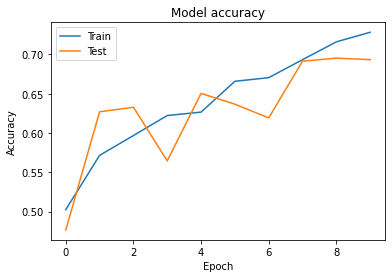

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend((['Train', 'Test']), loc='upper left')
plt.show()

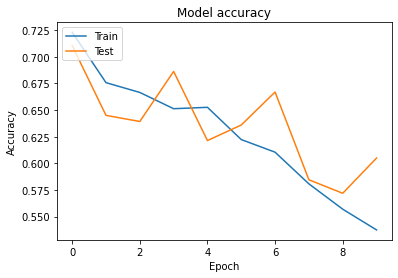

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend((['Train', 'Test']), loc='upper left')
plt.show()